# Telecom Customer Churn Prediction & Analysis

This notebook focuses on building a churn predictive model that used to identify high-risk customers and calculate expected financial loss for smarter retention planning.

# Data loading & Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/churn.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# Data Preprocessing

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Model Building

In [11]:
df_ml = df.copy() # didn't drop columnID as it will be usefull later
df_ml = pd.get_dummies(df_ml, drop_first=True)

In [12]:
y = df_ml['Churn_Yes']     # because get_dummies creates Churn_Yes
X = df_ml.drop(['Churn_Yes'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [14]:
# Scaling the numerical columns only
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [16]:
y_pred = lr.predict(X_test).astype(int)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [17]:
y_pred_prob

array([0.81241953, 0.13867066, 0.01116473, ..., 0.0162344 , 0.71412266,
       0.42601117])

In [18]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy : {accuracy: .2f}")

Accuracy :  0.77


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.77      0.83      1539
        True       0.56      0.79      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113



In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[1180  359]
 [ 122  452]]


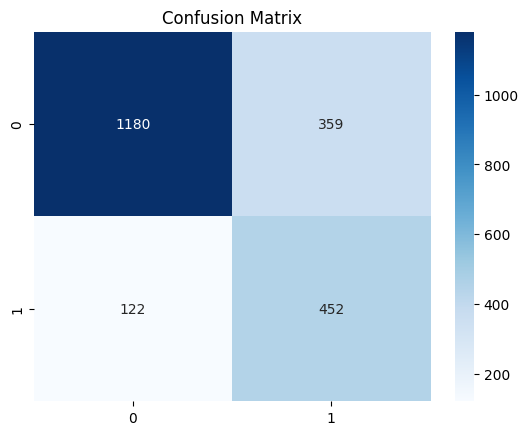

Mapping: Not Churn = 0, Churn = 1


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

print("Mapping: Not Churn = 0, Churn = 1")

# Advanced Analysis

In [23]:
features = X_train.columns

In [24]:
df_full = df_ml.copy()  # must use encoded version
df_full[num_cols] = scaler.transform(df_full[num_cols])

df_full['pred_prob'] = lr.predict_proba(df_full[X.columns])[:, 1]

df_full['pred_prob'].describe()

,pred_prob
count,7043.000000
mean,0.387493
std,0.295538
min,0.004300
25%,0.098196
50%,0.346161
75%,0.664449
max,0.929874


In [25]:
df_full.shape, df.shape

((7043, 7074), (7043, 21))

In [26]:
df_full.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,customerID_0067-DKWBL,customerID_0068-FIGTF,customerID_0071-NDAFP,customerID_0074-HDKDG,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0082-LDZUE,customerID_0082-OQIQY,customerID_0083-PIVIK,customerID_0089-IIQKO,customerID_0093-EXYQL,customerID_0093-XWZFY,customerID_0094-OIFMO,customerID_0096-BXERS,customerID_0096-FCPUF,customerID_0098-BOWSO,customerID_0100-DUVFC,customerID_0103-CSITQ,customerID_0104-PPXDV,customerID_0106-GHRQR,customerID_0106-UGRDO,customerID_0107-WESLM,customerID_0107-YHINA,customerID_0111-KLBQG,customerID_0112-QAWRZ,customerID_0112-QWPNC,customerID_0114-IGABW,customerID_0114-PEGZZ,customerID_0114-RSRRW,customerID_0115-TFERT,customerID_0117-LFRMW,customerID_0118-JPNOY,customerID_0121-SNYRK,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0125-LZQXK,customerID_0128-MKWSG,customerID_0129-KPTWJ,customerID_0129-QMPDR,customerID_0130-SXOUN,customerID_0133-BMFZO,customerID_0134-XWXCE,customerID_0135-NMXAP,customerID_0136-IFMYD,customerID_0137-OCGAB,customerID_0137-UDEUO,customerID_0139-IVFJG,customerID_0141-YEAYS,customerID_0142-GVYSN,customerID_0147-ESWWR,customerID_0148-DCDOS,customerID_0151-ONTOV,customerID_0156-FVPTA,customerID_0164-APGRB,customerID_0164-XAIRP,customerID_0168-XZKBB,customerID_0174-QRVVY,customerID_0177-PXBAT,customerID_0178-CIIKR,customerID_0178-SZBHO,customerID_0181-RITDD,customerID_0186-CAERR,customerID_0187-QSXOE,customerID_0187-WZNAB,customerID_0188-GWFLE,customerID_0191-EQUUH,customerID_0191-ZHSKZ,customerID_0193-ESZXP,customerID_0195-IESCP,customerID_0196-JTUQI,customerID_0196-VULGZ,customerID_0197-PNKNK,customerID_0201-MIBOL,customerID_0201-OAMXR,customerID_0203-HHYIJ,customerID_0206-OYVOC,customerID_0206-TBWLC,customerID_0207-MDKNV,customerID_0208-BPQEJ,customerID_0212-ISBBF,customerID_0214-JHPFW,customerID_0215-BQKGS,customerID_0218-QNVAS,customerID_0219-QAERP,customerID_0219-YTZUE,customerID_0220-EBGCE,customerID_0221-NAUXK,customerID_0221-WMXNQ,customerID_0222-CNVPT,customerID_0224-HJAPT,customerID_0224-NIJLP,customerID_0224-RLWWD,customerID_0225-ZORZP,customerID_0228-MAUWC,customerID_0229-LFJAF,customerID_0230-UBYPQ,customerID_0230-WEQUW,customerID_0231-LXVAP,customerID_0233-FTHAV,customerID_0234-TEVTT,customerID_0235-KGSLC,customerID_0236-HFWSV,customerID_0237-YFUTL,customerID_0238-WHBIQ,customerID_0239-OXEXL,customerID_0244-LGNFY,customerID_0247-SLUJI,customerID_0248-IPDFW,customerID_0248-PGHBZ,customerID_0253-ZTEOB,customerID_0254-FNMCI,customerID_0254-KCJGT,customerID_0254-WWRKD,customerID_0256-LTHVJ,customerID_0257-KXZGU,customerID_0257-ZESQC,customerID_0258-NOKBL,customerID_0259-GBZSH,customerID_0260-ZDLGK,customerID_0263-FJTQO,customerID_0264-CNITK,customerID_0265-EDXBD,customerID_0265-PSUAE,customerID_0266-CLZKZ,customerID_0266-GMEAO,customerID_0268-QKIWO,customerID_0269-XFESX,customerID_0270-THENM,customerID_0274-JKUJR,customerID_0277-BKSQP,customerID_0277-ORXQS,customerID_0278-YXOOG,customerID_0280-XJGEX,customerID_0281-CNTZX,customerID_0282-NVSJS,customerID_0285-INHLN,customerID_0289-IVARM,customerID_0292-WEGCH,customerID_0

In [27]:
df['pred_prob'] = df_full['pred_prob']
df.head()
#encoding(get_dummies) does NOT change row order, it only adds columns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,pred_prob
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.688502
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.098141
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.630241
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.077826
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.869115


In [28]:
def risk_level(p):
  if p >= 0.6:
    return 'High Risk'
  elif p >= 0.3:
    return 'Medium Risk'
  else:
    return 'Low Risk'

df['risk_segment'] = df['pred_prob'].apply(risk_level)

In [29]:
df['risk_segment'].value_counts()

,count
risk_segment,
Low Risk,3226
High Risk,2112
Medium Risk,1705


## 1. Revenue at Risk (RAR) for High-Risk Customers
> Finding how much money the company might lose if customer with a high probability of churn actually leave

In [30]:
df['expected_loss'] = df['MonthlyCharges'] * df['pred_prob'] #monthly revenue loss per customer

In [31]:
df.groupby('risk_segment')['expected_loss'].sum().round(2)

,expected_loss
risk_segment,
High Risk,126626.89
Low Risk,21130.75
Medium Risk,51175.14


In [32]:
rar = df['expected_loss'].sum()
rar

np.float64(198932.77718738635)

In [33]:
total_revenue = df['MonthlyCharges'].sum()
total_revenue

np.float64(456116.6)

In [34]:
rar_perc = (rar/total_revenue)*100
rar_perc

np.float64(43.61445673921676)

> Around **43.6% of monthly revenue** (₹1,98,932) is at risk, based on a probability-weighted calculation that considers every customer’s churn likelihood and the revenue they contribute.

> *This gives a realistic estimate because it captures **risk across both high and low churn-probability customers**, helping the company focus on the segments where revenue is most vulnerable.*


## 2. High-Value High-Risk (HVHR) Customers
These are the customers who:
- pay more than average (high value)
- have high churn probability (high risk)


> This segment gives the maximum revenue protection if retained.



In [35]:
high_value_threshold = df['MonthlyCharges'].median() # can take `mean` as well
high_risk_threshold = 0.6

In [36]:
hvhr = df[(df['MonthlyCharges'] >= high_value_threshold) & (df['pred_prob'] >= high_risk_threshold)]

In [37]:
hvhr_count = hvhr.shape[0]
hvhr_revenue = hvhr['MonthlyCharges'].sum()

hvhr_count, hvhr_revenue

(1542, np.float64(135619.55))

> There are 1,542 customers who pay above the median monthly charge and show a churn probability above 0.6.

> Together, they contribute ₹1,35,619.55 per month, making them the segment with the **highest immediate financial importance** for targeted retention.


## 3. Risk by Contract type (Short-term vs Long-term Stability)
This analysis will help in understanding which contract groups contribute the most to churn risk, helping the company understand where retension pressure is highest.

In [38]:
# Calculating mean churn probability per contract
contract_risk = df.groupby('Contract')['pred_prob'].mean().sort_values(ascending = False)
contract_risk

,pred_prob
Contract,
Month-to-month,0.592455
One year,0.225439
Two year,0.059751


In [39]:
# Expected loss per contract type
contract_loss = df.groupby('Contract')['expected_loss'].sum().sort_values(ascending = False)
contract_loss

,expected_loss
Contract,
Month-to-month,164462.257977
One year,26173.592691
Two year,8296.926519


- `Month-to-Month customers` carry the highest churn risk (0.59) and the largest expected loss of ₹1,64,462, making them **the primary segment** needing attention.

- `One-Year contracts` show moderate risk (0.23) with an expected loss of ₹26,173, indicating room for **improvement** but lower urgency.

- `Two-Year contracts` have very low risk (0.06) and the smallest expected loss of ₹8,296, confirming **strong retention** among long-term subscribers.

# Conclusion and Key Insights

- **43.6% of the company’s monthly revenue is at risk**, based on churn probabilities predicted by the model — highlighting a major exposure if these customers leave.

- This translates to an **expected monthly loss of ₹1,98,932**, calculated using each customer’s monthly charges weighted by their churn likelihood.

- A focused segment of **1,542 high-value customers with high churn probability** contributes **₹1,35,619** of this expected loss — making them the top-priority retention group.

- **Month-to-month customers show the highest churn risk (0.59)** and the highest expected loss (**₹1,64,462**), while **one-year** and **two-year contracts** contribute significantly less risk and loss.

- The model confirms that churn prediction allows the company to **quantify financial risk precisely**, making retention efforts more targeted and cost-effective.